<a href="https://colab.research.google.com/github/roldugina/data_analysis_projects/blob/main/Housing_price_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
df=pd.read_csv("https://raw.githubusercontent.com/roldugina/data_analysis_projects/main/Homes%20for%20Sale%20and%20Real%20Estate.csv")

Receiving general information about the dataframe

In [70]:
df.describe()

,Price,Beds,Bath,Sq.Ft
count,3.360000e+03,3360.000000,3360.000000,3360.000000
mean,7.500648e+05,3.125000,2.479167,1558.815179
std,6.447619e+05,1.349087,1.023546,1056.424307
min,1.419000e+05,1.000000,1.000000,307.000000
25%,3.990000e+05,2.000000,2.000000,933.000000
50%,6.199000e+05,3.000000,2.500000,1352.000000
75%,8.499220e+05,4.000000,3.500000,2023.250000
max,1.000000e+07,10.000000,8.000000,39654.000000


In [155]:
df.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles


In [156]:
df['Sq.M']=df['Sq.Ft']/10.764
df['Price usd']=df['Price']/1.33
df['Price usd per square']=df['Price usd']/df['Sq.M']
df['Avg beds']=df['Sq.M']/df['Beds']

In [76]:
mask_null=df.isnull().any()
mask_null

Address                 False
Price                   False
Description             False
Place                    True
Beds                    False
Bath                    False
Sq.Ft                   False
Website                  True
Sq.M                    False
Price usd               False
Price usd per square    False
Avg beds                False
dtype: bool

In [77]:
mask_null_place=df['Place'].isnull()
mask_null_site=df['Place'].isnull()

In [78]:
  df.loc[mask_null_place]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website,Sq.M,Price usd,Price usd per square,Avg beds
122,1066 Creekside Blvd SW,580900,CA AB T2X5K6,NaN,1,1.5,964,Maxwell Canyon Creek,89.557785,4.367669e+05,4876.928525,89.557785
641,62 Royston Terrace NW,849900,CA AB T3L 0J2,NaN,3,2.5,2467,Cir Realty,229.189892,6.390226e+05,2788.179488,76.396631
1154,3250 84 St SE,2400000,CA AB T2B 3C1,NaN,6,2.0,2147,RE/MAX Key,199.461167,1.804511e+06,9046.930321,33.243528
1174,8535 19 Ave SE #424,455000,CA AB T2A 7W8,NaN,2,1.5,1193,Exp Realty,110.832404,3.421053e+05,3086.689902,55.416202
1245,99 Taralake Way NE,672000,CA AB T3J0A7,NaN,5,3.5,1749,One Percent Realty,162.486065,5.052632e+05,3109.578406,32.497213
1324,148 Savanna Dr NE,850000,CA AB T3J2H5,NaN,4,3.0,2315,Maxwell Central,215.068748,6.390977e+05,2971.597460,53.767187
1519,9110 34 Ave,2299000,CA AB T1X 0L5,NaN,6,4.5,2034,Real Broker,188.963211,1.728571e+06,9147.661188,31.493868
1630,71 Lynx Meadows Dr NW,2000000,CA AB T3L 3L9,NaN,6,4.5,3688,Greater Property Group,342.623560,1.503759e+06,4388.955034,57.103927
1846,8535 19 Ave SE #421,505000,CA AB T2A 7W8,NaN,3,2.5,1428,Exp Realty,132.664437,3.796992e+05,2862.102736,44.221479
1867,4520 84 Ave NE,1000000,CA AB T3J 4C4,NaN,5,4.0,2753,Century 21 Bravo Realty,255.759941,7.518797e+05,2939.786808,51.151988


In [79]:
df_cleaned=df.dropna()

In [80]:
len(df_cleaned)-len(df)

-17

In [81]:
df['Address'].duplicated().any()

False

In [82]:
df_cleaned.describe()

,Price,Beds,Bath,Sq.Ft,Sq.M,Price usd,Price usd per square,Avg beds
count,3.343000e+03,3343.000000,3343.000000,3343.000000,3343.000000,3.343000e+03,3343.000000,3343.000000
mean,7.462591e+05,3.120251,2.476219,1554.477415,144.414476,5.610971e+05,3851.465032,48.311587
std,6.318098e+05,1.346989,1.023053,1049.637043,97.513661,4.750449e+05,1752.207206,23.738629
min,1.419000e+05,1.000000,1.000000,307.000000,28.520996,1.066917e+05,345.943160,13.718568
25%,3.985000e+05,2.000000,2.000000,931.500000,86.538462,2.996241e+05,2930.555918,36.494665
50%,6.190000e+05,3.000000,2.500000,1349.000000,125.325158,4.654135e+05,3433.041869,45.034374
75%,8.499000e+05,4.000000,3.500000,2019.000000,187.569677,6.390226e+05,4371.175644,56.554255
max,1.000000e+07,10.000000,8.000000,39654.000000,3683.946488,7.518797e+06,44393.261635,920.986622


In [95]:
price_upper_limit=df['Price usd per square'].mean()+3*df['Price usd per square'].std()
price_lower_limit=df['Price usd per square'].mean()-2*df['Price usd per square'].std()

In [96]:
mask_price=df['Price usd per square']>price_upper_limit

In [97]:
df_cleaned.loc[mask_price]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website,Sq.M,Price usd,Price usd per square,Avg beds
461,423 11 St NW,1099000,CA AB T2N 1X5,Hillhurst,5,3.0,962,Stratten Gates Real Estate Ltd.,89.371981,8.263158e+05,9245.803698,17.874396
770,918 Crescent Rd NW,3599000,CA AB T2M 4A8,Rosedale,3,4.5,2217,RE/MAX Real Estate (Central),205.964326,2.706015e+06,13138.270575,68.654775
791,839 Mcpherson Rd NE,849900,CA AB T2Z 4Z6,Bridgeland/Riverside,3,2.0,720,CA West Realty,66.889632,6.390226e+05,9553.387218,22.296544
1323,45 Aspen Acres Manor SW,2500000,CA AB T3H 0W5,Aspen Woods,1,1.0,950,Comox Realty,88.257153,1.879699e+06,21297.981797,88.257153
1639,3940 1A St SW,1550000,CA AB T2S 1R7,Parkhill,2,1.5,1027,Charles,95.410628,1.165414e+06,12214.714000,47.705314
1668,6407 58 St NW,2499000,CA AB T3A4R5,Dalhousie,2,2.0,2056,RE/MAX House Of Real Estate,191.007061,1.878947e+06,9837.057137,95.503530
2127,3030 17 St SW #302,2325000,CA AB T2T 6X3,South CA,2,2.5,1939,Sotheby's International Realty Canada,180.137495,1.748120e+06,9704.366641,90.068748
2327,8539 48 Ave NW,1985000,CA AB T3B 2B1,Bowness,4,1.5,1500,RE/MAX Realty Professionals,139.353400,1.492481e+06,10710.045113,34.838350
2347,1208 39 Ave SW,2000000,CA AB T2T 2K5,Elbow Park,3,2.0,1649,CA West Realty,153.195838,1.503759e+06,9815.928542,51.065279
2359,333 39 Ave SW,1245000,CA AB T2S 0W8,Elbow Park,2,1.0,930,Stratten Gates Real Estate Ltd.,86.399108,9.360902e+05,10834.489449,43.199554


In [98]:
mask_beds=df_cleaned['Beds']==1

In [99]:
df_cleaned[mask_beds]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website,Sq.M,Price usd,Price usd per square,Avg beds
22,1805 26 Ave SW #302,269000,CA AB T2T 1E2,South CA,1,1.0,707,Exp Realty,65.681903,202255.639098,3079.320650,65.681903
24,215 25 Ave SW #403,212000,CA AB T2S 0L2,Mission,1,1.0,563,Real Estate Professionals Inc.,52.303976,159398.496241,3047.540699,52.303976
58,222 Riverfront Ave SW #414,469000,CA AB T2P 0X2,Chinatown,1,1.0,700,Grand Realty,65.031587,352631.578947,5422.466165,65.031587
72,310 12 Ave SW #2604,279900,CA AB T2R 1B5,Beltline,1,1.0,445,RE/MAX Realty Professionals,41.341509,210451.127820,5090.552674,41.341509
94,225 11 Ave SE #1909,330000,CA AB T2G 0G3,Beltline,1,1.0,549,Coldwell Banker Mountain Central,51.003344,248120.300752,4864.784913,51.003344
...,...,...,...,...,...,...,...,...,...,...,...,...
3310,221 6 Ave SE #1905,201999,CA AB T2G 4Z9,Downtown Commercial Core,1,1.0,767,E-Trinity Realty And Management Ltd,71.256039,151878.947368,2131.453702,71.256039
3313,47 34 Ave SW,749900,CA AB T2S 2Y9,Parkhill,1,1.0,689,Purpose Realty,64.009662,563834.586466,8808.585615,64.009662
3319,2727 28 Ave SE #109,234900,CA AB T2B 0L4,Dover,1,1.0,571,Stratten Gates Real Estate Ltd.,53.047194,176616.541353,3329.422857,53.047194
3328,226 Village Terrace SW #5,234000,CA AB T3H2L4,Patterson,1,1.0,542,Cir Realty,50.353029,175939.849624,3494.126460,50.353029


In [100]:
df_cleaned['Price usd per square'].sort_values(ascending=False)

3254    44393.261635
3136    36211.333703
3247    25798.972046
3349    21423.264042
1323    21297.981797
            ...     
322      1605.264948
2326     1604.226602
387      1546.743926
1247     1515.090759
1584      345.943160
Name: Price usd per square, Length: 3343, dtype: float64

In [101]:
df_cleaned['Avg beds'].sort_values(ascending=False)

1584    920.986622
3149    218.289360
143     198.067633
3358    164.622817
3195    149.108138
           ...    
3359     15.220488
960      15.026942
973      14.647591
2416     14.461786
886      13.718568
Name: Avg beds, Length: 3343, dtype: float64

<Axes: >

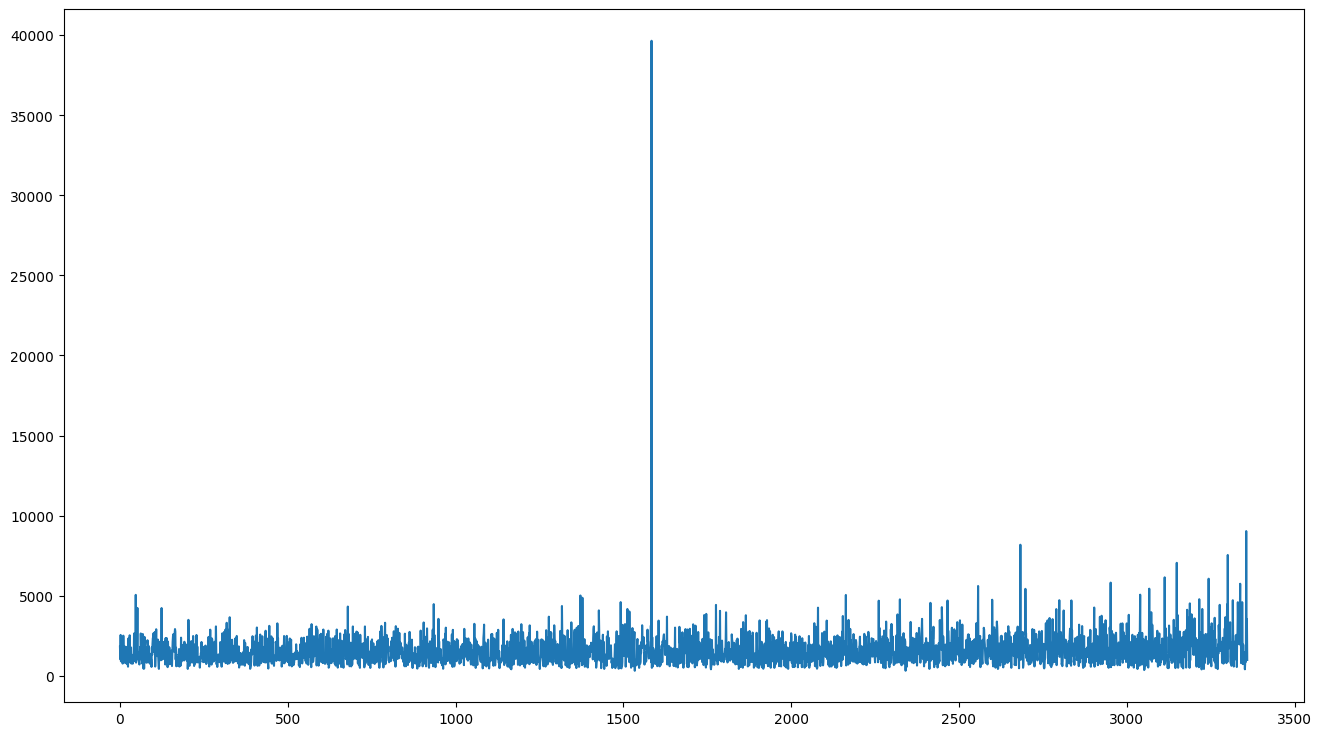

In [120]:
df['Sq.Ft'].plot(figsize=[16,9])

In [117]:
mask_max_beds=df_cleaned['Avg beds']==df_cleaned['Avg beds'].max()

In [136]:
df_cleaned.loc[mask_max_beds]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website,Sq.M,Price usd,Price usd per square,Avg beds
1584,2012 3 Ave NW,1695000,CA AB T2N 0K2,West Hillhurst,4,3.5,3684,Cir Realty,342.251951,1.274436e+06,3723.678088,85.562988


In [137]:
df_cleaned.loc[1584,'Sq.Ft']=df_cleaned.loc[1584,'Sq.Ft']=3684

In [138]:
df_cleaned

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website,Sq.M,Price usd,Price usd per square,Avg beds
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty,168.431810,7.368414e+05,4374.716121,42.107952
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.,95.596433,3.307519e+05,3459.876806,47.798216
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty,236.436269,7.142857e+05,3021.049677,59.109067
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals,83.426236,2.105263e+05,2523.502520,41.713118
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles,137.681159,4.879699e+05,3544.202612,68.840580
...,...,...,...,...,...,...,...,...,...,...,...,...
3354,151 Skyview Bay NE #Type F,429900,CA AB T3N 1B6,Skyview Ranch,3,2.0,1275,Century 21 Bravo Realty,118.450390,3.232331e+05,2728.847766,39.483463
3355,203 17 Ave NE,799000,CA AB T2E 1L9,Tuxedo Park,3,2.0,869,RE/MAX Real Estate (Central),80.732070,6.007519e+05,7441.304066,26.910690
3357,289 Sage Hill Circle NW,595000,CA AB T3R 1V2,Sage Hill,3,2.5,1733,RE/MAX House Of Real Estate,160.999628,4.473684e+05,2778.692259,53.666543
3358,738 1 Ave SW #1307,7988000,CA AB T2P 5G8,Eau Claire,2,2.5,3544,RE/MAX Real Estate (Central),329.245634,6.006015e+06,18241.745447,164.622817


In [162]:
df_cleaned.drop(columns='Price usd')
df_cleaned['Price usd']=df_cleaned['Price']/1.33
df_cleaned['Avg beds']=df_cleaned['Sq.M']/df_cleaned['Beds']
df_cleaned['Sq.M']=df_cleaned['Sq.Ft']/10.764
df_cleaned['Price usd per square']=df_cleaned['Price usd']/df_cleaned['Sq.M']

<Axes: >

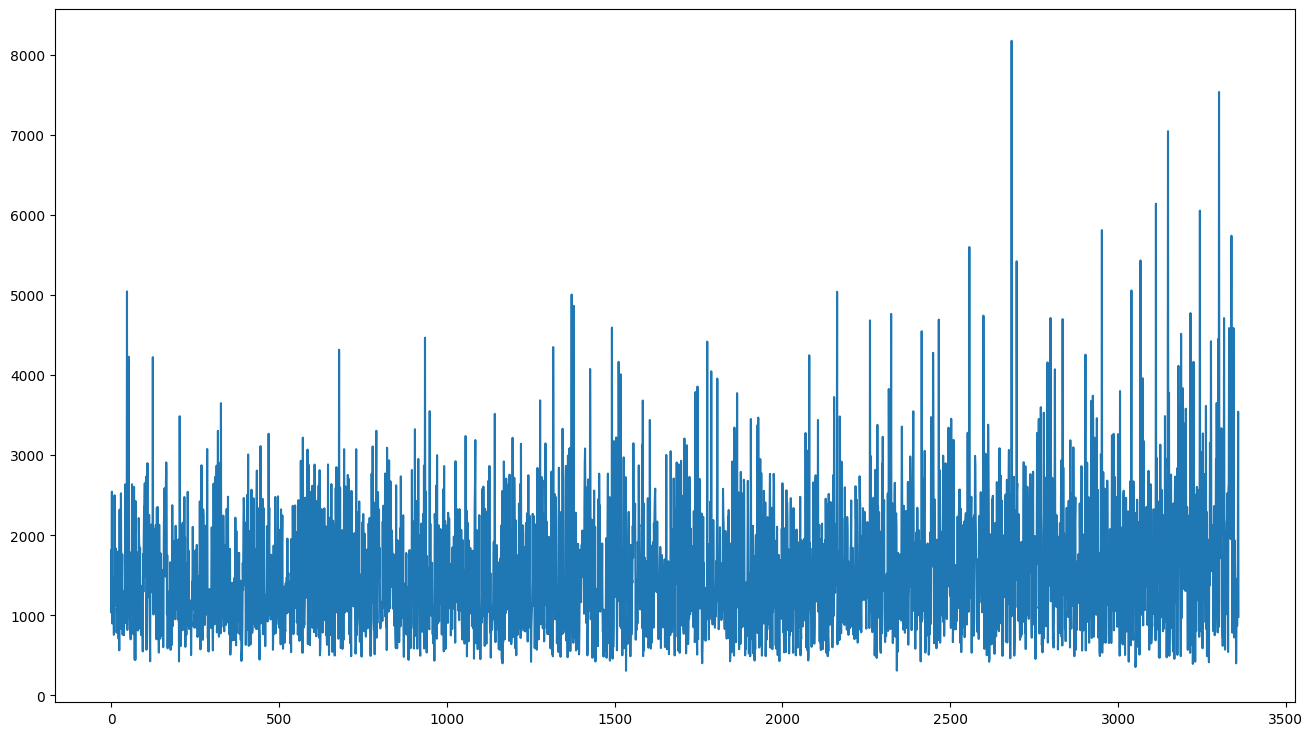

In [165]:
df_cleaned['Sq.Ft'].plot(figsize=[16,9])

<Axes: ylabel='Frequency'>

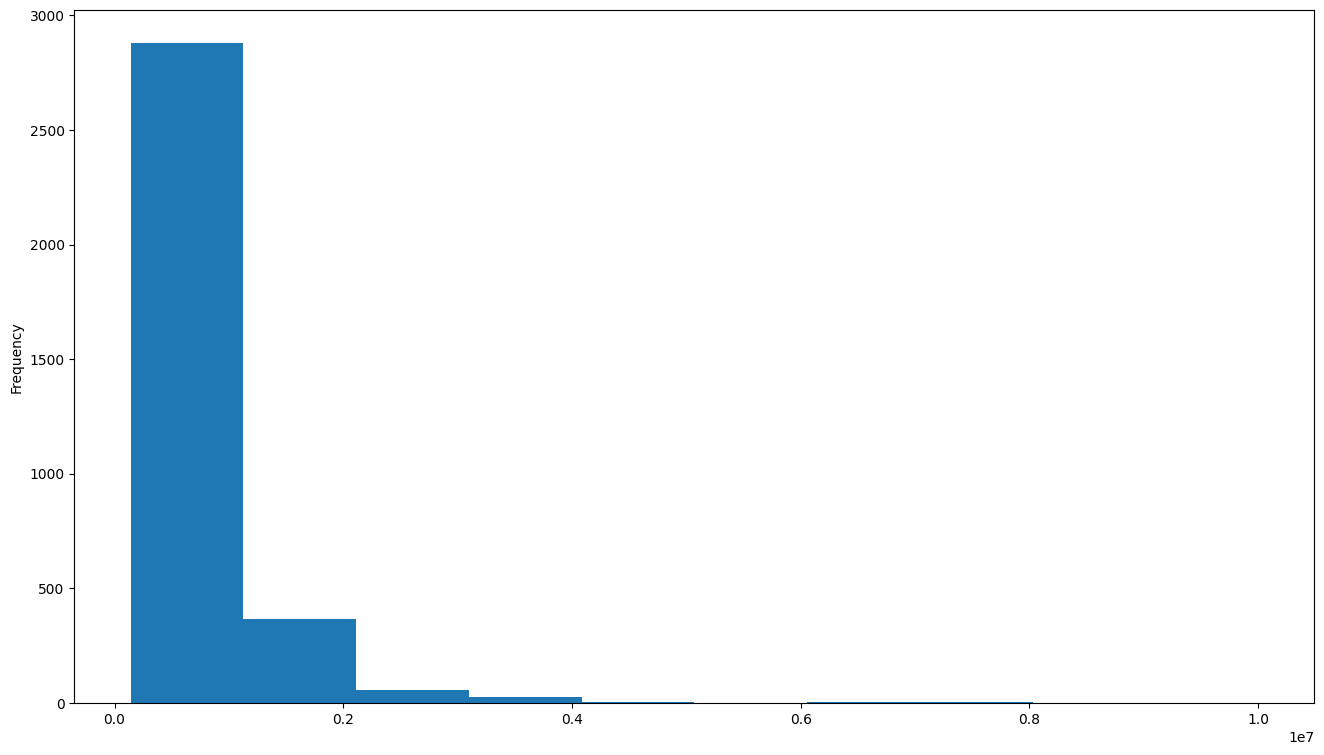

In [170]:
df_cleaned['Price'].plot(figsize=[16,9],kind='hist',)

In [164]:
df_cleaned.loc[df_cleaned['Sq.Ft']==df_cleaned['Sq.Ft'].max()]

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website,Sq.M,Price usd,Price usd per square,Avg beds
2683,19 Elveden Place SW,3700000,CA AB T3H 0L1,Springbank Hill,8,7.5,8179,Real Broker,759.84764,2.781955e+06,3661.20093,94.980955
